In [1]:
%pip install stargazer

import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn import datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
df_qui = pd.read_excel('ejercicio de regresion_orig.xlsx')
df_qui.head()

,trat_prev,ubicacion,red solidos,red oxigeno
0,0,1,3,5
1,0,2,7,11
2,0,3,11,21
3,0,3,15,16
4,0,3,18,16


## Regresión con datos agrupados

In [3]:
# Agrupar por 'ubicacion' y aplicar funciones de agregación
df_qui_ubi = df_qui.groupby('ubicacion').agg({'red oxigeno': 'mean', 'red solidos': 'mean'}).reset_index()

df_qui_ubi.head(10)

,ubicacion,red oxigeno,red solidos
0,1,24.500000,23.500000
1,2,24.000000,25.333333
2,3,27.666667,24.833333
3,4,32.666667,32.333333
4,5,33.600000,34.200000
5,6,38.000000,36.000000
6,7,47.000000,45.666667
7,8,37.000000,36.750000
8,9,41.000000,41.333333
9,10,40.333333,40.000000


In [4]:
# Eliminar filas con valores NaN
df_qui_clean = df_qui_ubi.dropna(subset=['red solidos', 'red oxigeno'])

# Agregar una columna de constantes para el término constante en el modelo
df_qui_clean['constante'] = 1

# Definir las variables dependiente e independiente
y = df_qui_clean['red oxigeno']
X = df_qui_clean[['constante', 'red solidos']]  # Usar 'constante' como término constante

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            red oxigeno   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     286.9
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.50e-07
Time:                        00:45:05   Log-Likelihood:                -15.833
No. Observations:                  10   AIC:                             35.67
Df Residuals:                       8   BIC:                             36.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
constante       0.9662      2.028      0.477      

C:\Users\usuario\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# Estimamos un modelo MPL (Regresión por mínimos cuadrados ordinarios)
X_mpl = df_qui_clean[['red solidos']]
X_mpl = sm.add_constant(X_mpl)
y_mpl = df_qui_clean['red oxigeno']

mpl_model = sm.OLS(y_mpl, X_mpl)
mpl_result = mpl_model.fit()

# Imprimimos el resumen del modelo MPL
print(mpl_result.summary())

                            OLS Regression Results                            
Dep. Variable:            red oxigeno   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     286.9
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.50e-07
Time:                        00:45:05   Log-Likelihood:                -15.833
No. Observations:                  10   AIC:                             35.67
Df Residuals:                       8   BIC:                             36.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9662      2.028      0.477      

C:\Users\usuario\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
df_diabetes = pd.read_excel('diabetes_dataset.xlsx')
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,binary_response
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135,0


In [7]:
# Estimamos un modelo MPL (Regresión por mínimos cuadrados ordinarios)
X_mpl = df_diabetes[['age', 'bmi', 'bp']]
X_mpl = sm.add_constant(X_mpl)
y_mpl = df_diabetes['binary_response']

mpl_model = sm.OLS(y_mpl, X_mpl)
mpl_result = mpl_model.fit()

# Imprimimos el resumen del modelo MPL
print(mpl_result.summary())

                            OLS Regression Results                            
Dep. Variable:        binary_response   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     59.57
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           2.57e-32
Time:                        00:45:05   Log-Likelihood:                -201.07
No. Observations:                 442   AIC:                             410.1
Df Residuals:                     438   BIC:                             426.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2873      0.018     15.769      0.0

In [8]:
# Estimamos un modelo Logit
X_logit = df_diabetes[['age', 'bmi', 'bp']]
X_logit = sm.add_constant(X_logit)  # Agregamos una constante (intercept)
y_logit = df_diabetes['binary_response']

logit_model = sm.Logit(y_logit, X_logit)
logit_result = logit_model.fit()

# Imprimimos el resumen del modelo Logit
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.438923
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        binary_response   No. Observations:                  442
Model:                          Logit   Df Residuals:                      438
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                  0.2681
Time:                        00:45:05   Log-Likelihood:                -194.00
converged:                       True   LL-Null:                       -265.09
Covariance Type:            nonrobust   LLR p-value:                 1.290e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2649      0.140     -9.018      0.000      -1.540      -0.990
age           -1.0993      2.

# Tipos de Distribuciones

## Distribucion normal y Distribucion Chi Cuadrado

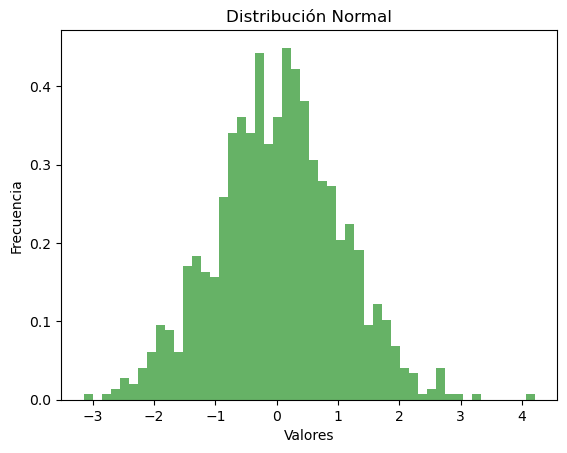

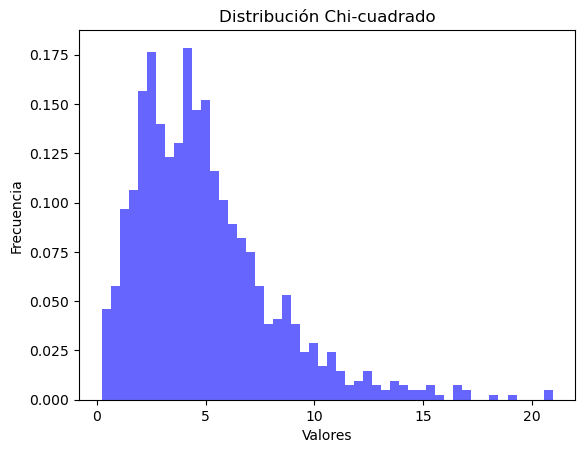

In [9]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

# Distribución Normal
mu, sigma = 0, 1  # Media y desviación estándar
datos_normales = np.random.normal(mu, sigma, 1000)

# Gráfica de la distribución normal
plt.hist(datos_normales, bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribución Normal')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

# Distribución Chi-cuadrado
grados_libertad = 5
datos_chi_cuadrado = np.random.chisquare(grados_libertad, 1000)

# Gráfica de la distribución chi-cuadrado
plt.hist(datos_chi_cuadrado, bins=50, density=True, alpha=0.6, color='b')
plt.title('Distribución Chi-cuadrado')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()


Regresión Lineal Simple:
                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     51.93
Date:                Fri, 05 Jan 2024   Prob (F-statistic):            0.00551
Time:                        00:45:06   Log-Likelihood:                -52.399
No. Observations:                   5   AIC:                             108.8
Df Residuals:                       3   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -

C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


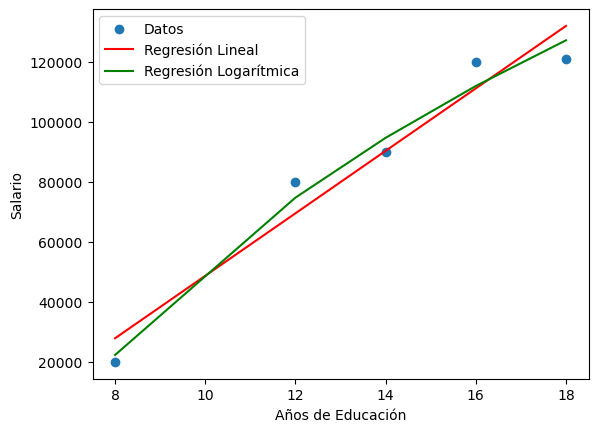

In [10]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo (reemplaza esto con tu propio DataFrame)
data = {
    'salario': [20000, 80000, 90000, 120000, 121000],
    'educacion_anios': [8, 12, 14, 16, 18],
}

df = pd.DataFrame(data)

# Regresión lineal simple
X_linear = sm.add_constant(df['educacion_anios'])
model_linear = sm.OLS(df['salario'], X_linear)
result_linear = model_linear.fit()

# Regresión logarítmica
X_log = sm.add_constant(np.log(df['educacion_anios']))
model_log = sm.OLS(df['salario'], X_log)
result_log = model_log.fit()

# Imprimir los resultados de ambas regresiones
print("Regresión Lineal Simple:")
print(result_linear.summary())

print("\nRegresión Logarítmica:")
print(result_log.summary())

# Graficar los resultados
plt.scatter(df['educacion_anios'], df['salario'], label='Datos')
plt.plot(df['educacion_anios'], result_linear.predict(), label='Regresión Lineal', color='red')
plt.plot(df['educacion_anios'], result_log.predict(), label='Regresión Logarítmica', color='green')
plt.xlabel('Años de Educación')
plt.ylabel('Salario')
plt.legend()
plt.show()



### Regresion lineal simple y Regresion logaritmica

Regresión Cuadrática:
                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     55.28
Date:                Fri, 05 Jan 2024   Prob (F-statistic):             0.0178
Time:                        00:45:06   Log-Likelihood:                -49.592
No. Observations:                   5   AIC:                             105.2
Df Residuals:                       2   BIC:                             104.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
co

C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


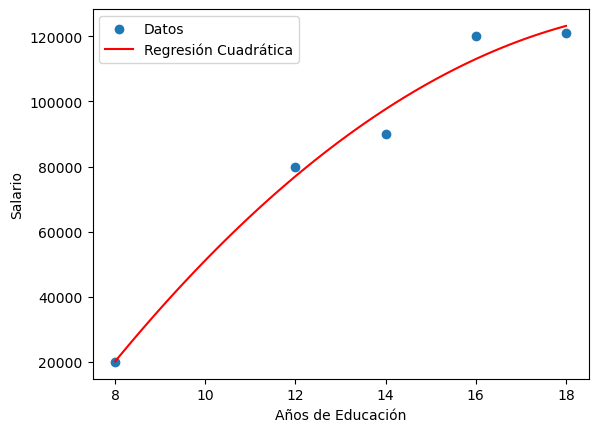

In [11]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear un DataFrame de ejemplo (reemplaza esto con tu propio DataFrame)
data = {
    'salario': [20000, 80000, 90000, 120000, 121000],
    'educacion_anios': [8, 12, 14, 16, 18],
}

df = pd.DataFrame(data)

# Agregar una columna con la variable cuadrática
df['educacion_anios_cuadrado'] = df['educacion_anios'] ** 2

# Regresión cuadrática
X_quad = sm.add_constant(df[['educacion_anios', 'educacion_anios_cuadrado']])
model_quad = sm.OLS(df['salario'], X_quad)
result_quad = model_quad.fit()

# Imprimir los resultados de la regresión cuadrática
print("Regresión Cuadrática:")
print(result_quad.summary())

# Graficar los resultados
educacion_range = np.linspace(df['educacion_anios'].min(), df['educacion_anios'].max(), 100)
educacion_range_quad = educacion_range ** 2

plt.scatter(df['educacion_anios'], df['salario'], label='Datos')
plt.plot(educacion_range, result_quad.predict(sm.add_constant(pd.DataFrame({'educacion_anios': educacion_range, 'educacion_anios_cuadrado': educacion_range_quad}))), label='Regresión Cuadrática', color='red')
plt.xlabel('Años de Educación')
plt.ylabel('Salario')
plt.legend()
plt.show()


Regresión Cuadrática:
                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     55.28
Date:                Fri, 05 Jan 2024   Prob (F-statistic):             0.0178
Time:                        00:45:06   Log-Likelihood:                -49.592
No. Observations:                   5   AIC:                             105.2
Df Residuals:                       2   BIC:                             104.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
co

C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


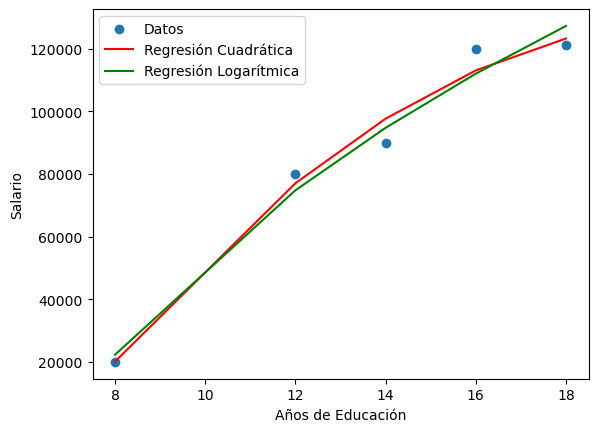

In [12]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo (reemplaza esto con tu propio DataFrame)
data = {
    'salario': [20000, 80000, 90000, 120000, 121000],
    'educacion_anios': [8, 12, 14, 16, 18],
}
    

df = pd.DataFrame(data)

# Regresión cuadrática
df['educacion_anios_cuadrado'] = df['educacion_anios'] ** 2
X_quad = sm.add_constant(df[['educacion_anios', 'educacion_anios_cuadrado']])
model_quad = sm.OLS(df['salario'], X_quad)
result_quad = model_quad.fit()

# Regresión logarítmica
df['log_educacion'] = np.log(df['educacion_anios'])
X_log = sm.add_constant(df['log_educacion'])
model_log = sm.OLS(df['salario'], X_log)
result_log = model_log.fit()

# Imprimir los resultados de ambas regresiones
print("Regresión Cuadrática:")
print(result_quad.summary())

print("\nRegresión Logarítmica:")
print(result_log.summary())

# Graficar los resultados
plt.scatter(df['educacion_anios'], df['salario'], label='Datos')
plt.plot(df['educacion_anios'], result_quad.predict(), label='Regresión Cuadrática', color='red')
plt.plot(df['educacion_anios'], result_log.predict(), label='Regresión Logarítmica', color='green')
plt.xlabel('Años de Educación')
plt.ylabel('Salario')
plt.legend()
plt.show()



In [13]:
from stargazer.stargazer import Stargazer

targazer = Stargazer([result])
stargazer.title("Comparación de Modelos Logit y MPL")
stargazer.custom_columns(["Modelo_MTP"], [1])  # Nombres de los modelos
stargazer.add_custom_notes(["Notas personalizadas para la tabla."])  # Notas personalizadas
stargazer

NameError: name 'result' is not defined

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo (reemplaza esto con tu propio DataFrame)
data = {
    'salario': [10000, 14000, 12000, 20000, 80000],
    'educacion_anios': [10, 10, 14, 16, 18],
    'sexo': ['mujer', 'hombre', 'mujer', 'hombre', 'mujer'],
}

df = pd.DataFrame(data)



# Convertir la variable categórica 'sexo' a dos columnas no booleanas
df_sexo = pd.get_dummies(df['sexo'], prefix='sexo', drop_first=False)

# Convertir los valores a enteros
df_sexo = df_sexo.astype(int)

# Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, df_sexo], axis=1)


print(df)


# Regresión múltiple
X = sm.add_constant(df[['educacion_anios', 'sexo_hombre', 'sexo_mujer']])
model = sm.OLS(df['salario'], X)
result = model.fit()

# Imprimir el resumen del modelo
print(result.summary())

# Graficar los resultados
plt.scatter(result['educacion_anios'], df['salario'], label='Datos', marker='o')
plt.plot(result['educacion_anios'][df['sexo_hombre'] == 1], result.predict()[df['sexo_hombre'] == 1], label='Hombre', marker='o', linestyle='-', color='blue')
plt.plot(result['educacion_anios'][df['sexo_mujer'] == 1], result.predict()[df['sexo_mujer'] == 1], label='Mujer', marker='o', linestyle='-', color='red')

plt.xlabel('Años de Escolaridad')
plt.ylabel('Salario')
plt.legend()
plt.show()


In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con las variables salario, educación y mujer
data = {'salario': [3000, 3500, 4000, 4500, 5000],
        'educacion': [10, 12, 14, 16, 18],
        'mujer': [0, 1, 0, 1, 0]}  # 0 para hombre, 1 para mujer

df = pd.DataFrame(data)

# Añadir una columna de unos para el intercepto
df['intercepto'] = 1

# Definir las variables independientes (X) y dependiente (y)
X = df[['intercepto', 'educacion', 'mujer']]
y = df['salario']

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Ajustar el modelo a los datos
resultado = modelo.fit()

# Obtener las predicciones del modelo para hombres y mujeres
predicciones_hombres = resultado.predict([1, 14, 0])
predicciones_mujeres = resultado.predict([1, 14, 1])

# Graficar los resultados
plt.scatter(df[df['mujer'] == 0]['educacion'], df[df['mujer'] == 0]['salario'], label='Hombres', color='blue')
plt.scatter(df[df['mujer'] == 1]['educacion'], df[df['mujer'] == 1]['salario'], label='Mujeres', color='red')

# Graficar las líneas de regresión
plt.plot(df[df['mujer'] == 0]['educacion'], resultado.predict(df[df['mujer'] == 0][['intercepto', 'educacion', 'mujer']]), color='blue')
plt.plot(df[df['mujer'] == 1]['educacion'], resultado.predict(df[df['mujer'] == 1][['intercepto', 'educacion', 'mujer']]), color='red')

# Etiquetas y leyenda
plt.xlabel('Educación')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)
data3 = np.random.randn(1000)

# Crear una figura y subgráficos (subplots)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Subgráfico 1 - Histograma de data1
axs[0].hist(data1, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Histograma 1')

# Subgráfico 2 - Histograma de data2
axs[1].hist(data2, bins=30, color='salmon', edgecolor='black')
axs[1].set_title('Histograma 2')

# Subgráfico 3 - Histograma de data3
axs[2].hist(data3, bins=30, color='lightgreen', edgecolor='black')
axs[2].set_title('Histograma 3')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm



# Crear una figura y subgráficos (subplots)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Subgráfico 1 - Histograma de data1
axs[0].hist(df, bins=30, color='skyblue', edgecolor='black', density=True)
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(df), np.std(df))
axs[0].plot(x, p, 'k', linewidth=2)
axs[0].set_title('Histograma  con Distribución Normal')

# Subgráfico 2 - Histograma de data2
axs[1].hist(data2, bins=30, color='salmon', edgecolor='black', density=True)
xmin, xmax = axs[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(data2), np.std(data2))
axs[1].plot(x, p, 'k', linewidth=2)
axs[1].set_title('Histograma 2 con Distribución Normal')

# Subgráfico 3 - Histograma de data3
axs[2].hist(data3, bins=30, color='lightgreen', edgecolor='black', density=True)
xmin, xmax = axs[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(data3), np.std(data3))
axs[2].plot(x, p, 'k', linewidth=2)
axs[2].set_title('Histograma 3 con Distribución Normal')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd

# Crear una base de datos de ejemplo con 50 variables y 1000 filas

# Seleccionar las variables a graficar
variables_a_graficar = ['Var1', 'Var2', 'Var3']

# Crear una figura y subgráficos (subplots)
fig, axs = plt.subplots(1, len(variables_a_graficar), figsize=(15, 4))

# Iterar sobre las variables seleccionadas
for i, var in enumerate(variables_a_graficar):
    # Histograma de la variable actual
    axs[i].hist(df[var], bins=30, color='skyblue', edgecolor='black', density=True)
    
    # Ajustar la distribución normal
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(df[var]), np.std(df[var]))
    
    # Trazar la línea de distribución normal
    axs[i].plot(x, p, 'k', linewidth=2)
    
    # Configuración del título
    axs[i].set_title(f'Histograma {var} con Distribución Normal')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos' con columnas 'monto_jubilacion', 'escolaridad', y 'genero' (0 para hombres, 1 para mujeres).

# Crear variables dummy para el género
datos['genero_dummy'] = pd.get_dummies(datos['genero'], drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = sm.add_constant(datos[['escolaridad', 'genero_dummy']])
y = datos['monto_jubilacion']

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir los resultados
print(modelo.summary())

# Graficar la regresión diferenciando entre hombres y mujeres
plt.scatter(datos['escolaridad'][datos['genero'] == 0], y[datos['genero'] == 0], label='Hombres', alpha=0.7)
plt.scatter(datos['escolaridad'][datos['genero'] == 1], y[datos['genero'] == 1], label='Mujeres', alpha=0.7)

# Graficar la línea de regresión
escolaridad_range = range(int(min(datos['escolaridad'])), int(max(datos['escolaridad'])) + 1)
predicciones_hombres = modelo.predict(sm.add_constant(pd.DataFrame({'escolaridad': escolaridad_range, 'genero_dummy': 0})))
predicciones_mujeres = modelo.predict(sm.add_constant(pd.DataFrame({'escolaridad': escolaridad_range, 'genero_dummy': 1})))

plt.plot(escolaridad_range, predicciones_hombres, label='Regresión Hombres', color='blue')
plt.plot(escolaridad_range, predicciones_mujeres, label='Regresión Mujeres', color='red')

# Configurar la leyenda y etiquetas
plt.legend()
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal: Relación entre Escolaridad y Monto de Jubilación por Género')

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    'monto_jubilacion': [50000, 60000, 70000, 55000, 65000, 75000, 80000, 90000, 95000, 100000],
    'escolaridad': [10, 12, 14, 11, 13, 15, 16, 18, 19, 20],
    'genero': [0, 0, 1, 1, 0, 1, 0, 1, 0, 1],  # 0 para hombres, 1 para mujeres
}

datos = pd.DataFrame(data)

# Verificar el tipo de dato de 'monto_jubilacion'
print(datos['monto_jubilacion'].dtype)

# Convertir 'monto_jubilacion' a tipo numérico
datos['monto_jubilacion'] = datos['monto_jubilacion'].astype(float)

# Verificar nuevamente el tipo de dato
print(datos['monto_jubilacion'].dtype)

# Crear variables dummy para el género
datos['genero_dummy'] = pd.get_dummies(datos['genero'], drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = sm.add_constant(datos[['escolaridad', 'genero_dummy']])
y = datos['monto_jubilacion']

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimir los resultados
print(modelo.summary())

# Graficar la regresión diferenciando entre hombres y mujeres
plt.scatter(datos['escolaridad'][datos['genero'] == 0], y[datos['genero'] == 0], label='Hombres', alpha=0.7)
plt.scatter(datos['escolaridad'][datos['genero'] == 1], y[datos['genero'] == 1], label='Mujeres', alpha=0.7)

# Graficar la línea de regresión
escolaridad_range = range(int(min(datos['escolaridad'])), int(max(datos['escolaridad'])) + 1)
predicciones_hombres = modelo.predict(sm.add_constant(pd.DataFrame({'escolaridad': escolaridad_range, 'genero_dummy': 0})))
predicciones_mujeres = modelo.predict(sm.add_constant(pd.DataFrame({'escolaridad': escolaridad_range, 'genero_dummy': 1})))

plt.plot(escolaridad_range, predicciones_hombres, label='Regresión Hombres', color='blue')
plt.plot(escolaridad_range, predicciones_mujeres, label='Regresión Mujeres', color='red')

# Configurar la leyenda y etiquetas
plt.legend()
plt.xlabel('Años de Escolaridad')
plt.ylabel('Monto de la Jubilación')
plt.title('Regresión Lineal: Relación entre Escolaridad y Monto de Jubilación por Género')

# Mostrar el gráfico
plt.show()


In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Crear datos de ejemplo
np.random.seed(42)
n = 100
X1 = np.random.rand(n)
X2 = np.random.rand(n)
X3 = np.random.rand(n)
interact_X1X2 = X1 * X2  # Interacción entre X1 y X2
y = 2 + 3*X1 + 4*X2 + 5*X3 + 0.5*interact_X1X2 + np.random.normal(0, 1, n)

# Crear un DataFrame con los datos
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Interact_X1X2': interact_X1X2, 'y': y})

# Ajustar el modelo de regresión lineal múltiple con interacción
model = sm.OLS(data['y'], sm.add_constant(data[['X1', 'X2', 'X3', 'Interact_X1X2']]))
result = model.fit()

# Imprimir los resultados del modelo
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.92e-35
Time:                        00:45:13   Log-Likelihood:                -137.98
No. Observations:                 100   AIC:                             286.0
Df Residuals:                      95   BIC:                             299.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7515      0.414      4.234

In [15]:
import pandas as pd
import statsmodels.api as sm

# Crear un conjunto de datos de ejemplo
data = {'X1': [1, 2, 3, 4, 5],
        'X2': [2, 4, 1, 3, 5],
        'X3': [3, 1, 4, 2, 5],
        'X4': [4, 5, 2, 1, 3],
        'Y': [10, 20, 15, 25, 30]}

df = pd.DataFrame(data)

# Agregar términos de interacción
df['X1_X2'] = df['X1'] * df['X2']
df['X1_X3'] = df['X1'] * df['X3']
df['X2_X3'] = df['X2'] * df['X3']
df['X1_X4'] = df['X1'] * df['X4']

# Ajustar el modelo de regresión lineal múltiple con interacciones
X = df[['X1', 'X2', 'X3', 'X4', 'X1_X2', 'X1_X3', 'X2_X3', 'X1_X4']]
X = sm.add_constant(X)  # Agregar constante al modelo
y = df['Y']

model = sm.OLS(y, X).fit()

# Imprimir resultados del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 05 Jan 2024   Prob (F-statistic):                nan
Time:                        00:46:42   Log-Likelihood:                 149.88
No. Observations:                   5   AIC:                            -289.8
Df Residuals:                       0   BIC:                            -291.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8958        inf          0        n

C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\usuario\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
